In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

### Data Preparation

In [3]:
#read csv
df = pd.read_csv('wahl.csv', sep=',') #source csv: https://dawum.de/Bundestag/Forsa/

In [4]:
print(df.head())

        Datum CDU/CSU   SPD  FDP Grüne Linke   AfD Freie Wähler  BSW Sonstige
0  06.01.2016    38,0  23,0  5,0  10,0  10,0   8,0          NaN  NaN      6,0
1  13.01.2016    38,0  23,0  5,0  10,0  10,0   9,0          NaN  NaN      5,0
2  19.01.2016    37,0  23,0  5,0  10,0   9,0  10,0          NaN  NaN      6,0
3  27.01.2016    36,0  24,0  5,0  10,0  10,0  10,0          NaN  NaN      5,0
4  03.02.2016    36,0  24,0  5,0  10,0   9,0  10,0          NaN  NaN      6,0


In [5]:
print(df.columns)

Index(['Datum', 'CDU/CSU', 'SPD', 'FDP', 'Grüne', 'Linke', 'AfD',
       'Freie Wähler', 'BSW', 'Sonstige'],
      dtype='object')


In [6]:
#convert the column "Datum" from string to date time
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')

In [7]:
#drop columns that contain nan values
df_clean = df.dropna(axis=1)
print(df_clean)

         Datum CDU/CSU   SPD  FDP Grüne   AfD Sonstige
0   2016-01-06    38,0  23,0  5,0  10,0   8,0      6,0
1   2016-01-13    38,0  23,0  5,0  10,0   9,0      5,0
2   2016-01-19    37,0  23,0  5,0  10,0  10,0      6,0
3   2016-01-27    36,0  24,0  5,0  10,0  10,0      5,0
4   2016-02-03    36,0  24,0  5,0  10,0  10,0      6,0
..         ...     ...   ...  ...   ...   ...      ...
460 2024-12-03    32,0  16,0  3,0  12,0  18,0     11,0
461 2024-12-10    31,0  17,0  4,0  13,0  18,0     10,0
462 2024-12-17    30,0  17,0  4,0  13,0  19,0     10,0
463 2024-12-23    31,0  16,0  3,0  13,0  19,0     10,0
464 2025-01-07    32,0  17,0  3,0  12,0  19,0     10,0

[465 rows x 7 columns]


In [8]:
#convert string values in your dataframe to float
conv_columns = ['CDU/CSU', 'SPD', 'FDP', 'Grüne', 'AfD', 'Sonstige']

for col in conv_columns:
    df_clean[col] = pd.to_numeric(df_clean[col].str.replace(',', '.'))

/tmp/ipykernel_19269/4194043143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = pd.to_numeric(df_clean[col].str.replace(',', '.'))


In [9]:
print(df_clean)

         Datum  CDU/CSU   SPD  FDP  Grüne   AfD  Sonstige
0   2016-01-06     38.0  23.0  5.0   10.0   8.0       6.0
1   2016-01-13     38.0  23.0  5.0   10.0   9.0       5.0
2   2016-01-19     37.0  23.0  5.0   10.0  10.0       6.0
3   2016-01-27     36.0  24.0  5.0   10.0  10.0       5.0
4   2016-02-03     36.0  24.0  5.0   10.0  10.0       6.0
..         ...      ...   ...  ...    ...   ...       ...
460 2024-12-03     32.0  16.0  3.0   12.0  18.0      11.0
461 2024-12-10     31.0  17.0  4.0   13.0  18.0      10.0
462 2024-12-17     30.0  17.0  4.0   13.0  19.0      10.0
463 2024-12-23     31.0  16.0  3.0   13.0  19.0      10.0
464 2025-01-07     32.0  17.0  3.0   12.0  19.0      10.0

[465 rows x 7 columns]


In [10]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datum     465 non-null    datetime64[ns]
 1   CDU/CSU   465 non-null    float64       
 2   SPD       465 non-null    float64       
 3   FDP       465 non-null    float64       
 4   Grüne     465 non-null    float64       
 5   AfD       465 non-null    float64       
 6   Sonstige  465 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 25.6 KB
None


In [11]:
#show all maximum values
print(df_clean.max())

Datum       2025-01-07 00:00:00
CDU/CSU                    40.0
SPD                        32.0
FDP                        16.0
Grüne                      28.0
AfD                        23.0
Sonstige                   15.0
dtype: object


In [12]:
#show all minimum values
print(df_clean.min())

Datum       2016-01-06 00:00:00
CDU/CSU                    19.0
SPD                        11.0
FDP                         3.0
Grüne                       6.0
AfD                         7.0
Sonstige                    4.0
dtype: object


In [13]:
#show the results on a specific date
enter_date = input("Enter a date in the format: YYYY-MM-DD") #2025-01-07

line = df_clean[df_clean["Datum"] == enter_date]
print(line)

Enter a date in the format: YYYY-MM-DD 2025-01-07


         Datum  CDU/CSU   SPD  FDP  Grüne   AfD  Sonstige
464 2025-01-07     32.0  17.0  3.0   12.0  19.0      10.0


------------------------------------------

### Make Predicions

#### Predicting a time span

In [17]:
df = df_clean.copy()

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def linear_regression_forecast(df, target_column, days_to_predict=30, test_size=0.2, random_state=42):

    #convert date to index
    df['Datum'] = range(len(df))
    
    #define features and target value
    X = df[['Datum']]
    y = df[target_column]
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    #create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #prediction on future values
    future_index = np.arange(len(df), len(df) + days_to_predict)
    future_X = pd.DataFrame({'Datum': future_index})
    future_predictions = model.predict(future_X)
    print(future_predictions, '\n')
    
    #save results
    future_X['Prediction'] = future_predictions
    return future_X

In [19]:
#enter target column (choose your party)
enter_tcol = input("Enter as target column: \nCDU/CSU \nSPD \nFDP \nGrüne \nAfD \n\n =>")

Enter as target column: 
CDU/CSU 
SPD 
FDP 
Grüne 
AfD 

 => CDU/CSU


In [20]:
#call function
future_results = linear_regression_forecast(df, target_column=enter_tcol)
print(future_results)

[27.22737333 27.21198887 27.19660441 27.18121995 27.16583549 27.15045103
 27.13506657 27.11968212 27.10429766 27.0889132  27.07352874 27.05814428
 27.04275982 27.02737536 27.0119909  26.99660645 26.98122199 26.96583753
 26.95045307 26.93506861 26.91968415 26.90429969 26.88891523 26.87353078
 26.85814632 26.84276186 26.8273774  26.81199294 26.79660848 26.78122402] 

    Datum  Prediction
0     465   27.227373
1     466   27.211989
2     467   27.196604
3     468   27.181220
4     469   27.165835
5     470   27.150451
6     471   27.135067
7     472   27.119682
8     473   27.104298
9     474   27.088913
10    475   27.073529
11    476   27.058144
12    477   27.042760
13    478   27.027375
14    479   27.011991
15    480   26.996606
16    481   26.981222
17    482   26.965838
18    483   26.950453
19    484   26.935069
20    485   26.919684
21    486   26.904300
22    487   26.888915
23    488   26.873531
24    489   26.858146
25    490   26.842762
26    491   26.827377
27    492   26.8

#### Predicting a specific future date

In [22]:
def predict_specific_date(df, target_column, specific_date, test_size=0.2, random_state=42):
    
    #set date to datetime
    df['Datum'] = pd.to_datetime(df['Datum'])
    df['numeric_index'] = (df['Datum'] - df['Datum'].min()).dt.days

    #define features and target
    X = df[['numeric_index']]
    y = df[target_column]

    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    #prediction on the data
    specific_index = (pd.to_datetime(specific_date) - df['Datum'].min()).days
    specific_X = pd.DataFrame({'numeric_index': [specific_index]})
    specific_prediction = model.predict(specific_X)

    return specific_prediction[0]

In [23]:
#calculate on single future prediction
specific_date = '2025-02-10'
prediction = predict_specific_date(df, target_column=enter_tcol, specific_date=specific_date)
print(f"Prediction for {specific_date}: {prediction}")

Prediction for 2025-02-10: 30.830645161290324


------------------------

## Visualization

In [55]:
def linear_regression_forecast(df, target_column, days_to_predict=30, test_size=0.2, random_state=42):

    #convert date to index
    df['Datum'] = range(len(df))
    
    #feature X and target y
    X = df[['Datum']]
    y = df[target_column]
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    #create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #prediction on future values
    future_index = np.arange(len(df), len(df) + days_to_predict)
    future_X = pd.DataFrame({'Datum': future_index})
    future_predictions = model.predict(future_X)
    
    #prediction on historical values
    historical_predictions = model.predict(X)
    
    #save results
    future_X['Prediction'] = future_predictions

    #combine historical and future data
    result_df = pd.concat([df.set_index('Datum'), future_X.set_index('Datum')])

    #visualization with seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=result_df.reset_index(), x='Datum', y=target_column, label='Actual')
    sns.lineplot(data=future_X.reset_index(), x='Datum', y='Prediction', color='red', linestyle='--', label='Prediction')
    sns.lineplot(x=df['Datum'], y=historical_predictions, color='green', label='Regression Line')
    plt.title(f'Linear Regression Forecast for {target_column}')
    plt.xlabel('Days')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    return ""

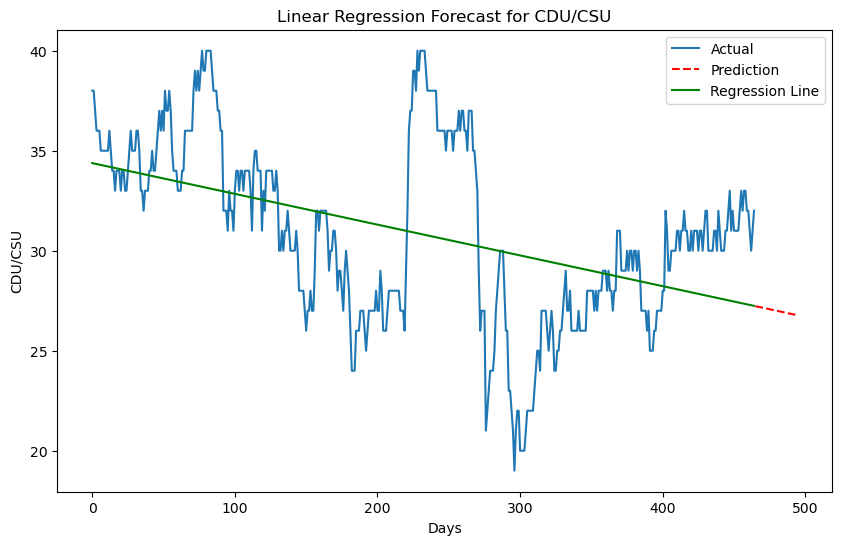

In [57]:
#call prediction function
predicted_df = linear_regression_forecast(df, target_column=enter_tcol)

print(predicted_df)

In [28]:
#reveal date index (start and end)
print(df_clean["Datum"].iloc[0]) #start date
print(df_clean["Datum"].iloc[-1]) #end date

print()

#find a specific date
enter_datind = int(input())
print(df_clean["Datum"].iloc[enter_datind])

2016-01-06 00:00:00
2025-01-07 00:00:00



 20


2016-05-24 00:00:00
